In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "/root/data/"

df_fake = pd.read_csv(data_path + "Fake.csv")
df_true = pd.read_csv(data_path + "True.csv")
df_fake['label'] = 1  # Fake news label
df_true['label'] = 0   # Real news label
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [25]:
df = pd.concat([df_true,df_fake])
df = df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


# nltk.download('punkt')
nltk.download('stopwords')
# nltk.download('wordnet')

def load_glove_vectors(glove_file_path):
    word_vectors = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            word_vectors[word] = vector
    return word_vectors

def preprocess_text(text):
    text = text.lower()                              # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)          # Remove special characters and numbers
    tokens = word_tokenize(text)                     # Tokenization
    stop_words = set(stopwords.words('english'))     # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatizer = WordNetLemmatizer()                 # Lemmatization  ex: running => run (not nesscessary, but i want to test)
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

glove_path = "/root/data/glove/"
word_vectors = load_glove_vectors(glove_path + "glove.6B.100d.txt")


df['clean_text'] = df['text'].apply(preprocess_text)
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,clean_text
0,WASHINGTON (Reuters) - The head of a conservat...,0,"[washington, reuters, head, conservative, repu..."
1,WASHINGTON (Reuters) - Transgender people will...,0,"[washington, reuters, transgender, people, all..."
2,WASHINGTON (Reuters) - The special counsel inv...,0,"[washington, reuters, special, counsel, invest..."
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0,"[washington, reuters, trump, campaign, adviser..."
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,"[seattlewashington, reuters, president, donald..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def tokens_to_vectors(tokens):
    vectors = []
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
    if not vectors: # return none if no valid word vectors found 
        return None
    return np.mean(vectors, axis=0)

df['doc_vector'] = df['clean_text'].apply(tokens_to_vectors)
df = df.dropna()

X_train = df['doc_vector'].tolist()
y_train = df['label']

df_2nd = pd.read_csv(data_path +"2nd/" +"train.csv")
df_2nd = df_2nd.drop(['title','author','id'],axis=1)

df_2nd['text'] = df_2nd['text'].astype(str)
df_2nd['clean_text'] = df_2nd['text'].apply(preprocess_text)
df_2nd['doc_vector'] = df_2nd['clean_text'].apply(tokens_to_vectors)
df_2nd = df_2nd.dropna()

X_test = df_2nd['doc_vector'].to_list()
y_test = df_2nd['label']

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.4309 - val_accuracy: 0.8058 - val_loss: 0.4220
Epoch 2/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9037 - loss: 0.2376 - val_accuracy: 0.8316 - val_loss: 0.3772
Epoch 3/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9112 - loss: 0.2260 - val_accuracy: 0.8522 - val_loss: 0.3366
Epoch 4/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2272 - val_accuracy: 0.8622 - val_loss: 0.3126
Epoch 5/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9078 - loss: 0.2258 - val_accuracy: 0.8422 - val_loss: 0.3491
Epoch 6/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9064 - loss: 0.2258 - val_accuracy: 0.8388 - val_loss: 0.3489
Epoch 7/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9058 - loss: 0.2264 - val_accuracy: 0.8569 - val_loss: 0.3217
Epoch 8/50
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.2203 - val_accurac

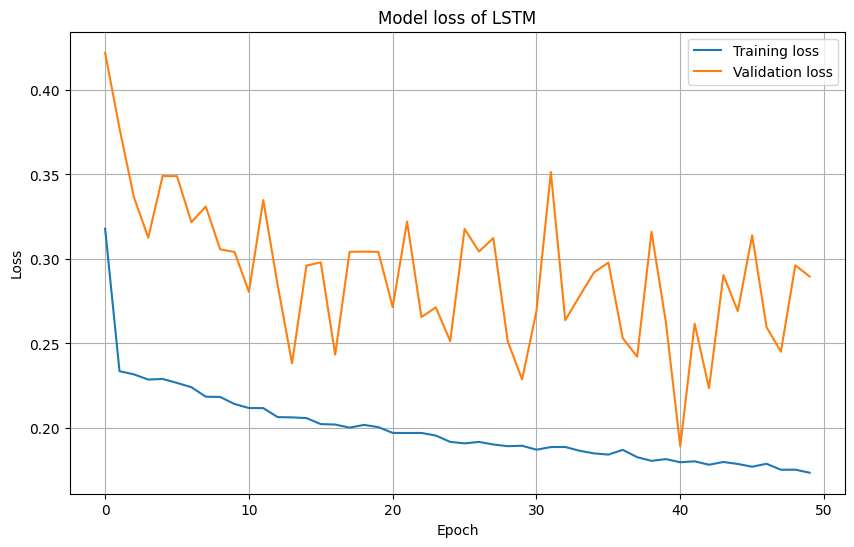

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D

max_len = len(X_train[0])

X_train_reshaped = np.reshape(X_train, (len(X_train), 1, max_len))
X_test_reshaped = np.reshape(X_test, (len(X_test), 1, max_len))

# Define the LSTM model
model0 = Sequential()
model0.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model0.add(Dense(1, activation='sigmoid'))

model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model0.summary())


# Train the model
history = model0.fit(X_train_reshaped, y_train, epochs=50, batch_size=128, validation_split=0.1)
loss, accuracy = model0.evaluate(X_test_reshaped, y_test)
y_pred = model0.predict(X_test_reshaped)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for positive class
y_probs = model0.predict(X_test_reshaped)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss of LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [29]:
import  numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_binary = np.round(y_pred).flatten()
print('----------------')
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_binary))
print('----------------')
print('Classification report')
print(classification_report(y_test, y_pred_binary))

----------------
Confusion matrix
[[3831 6555]
 [1827 8441]]
----------------
Classification report
              precision    recall  f1-score   support

           0       0.68      0.37      0.48     10386
           1       0.56      0.82      0.67     10268

    accuracy                           0.59     20654
   macro avg       0.62      0.60      0.57     20654
weighted avg       0.62      0.59      0.57     20654

